In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [42]:
data = pd.read_csv('medals.txt', sep="\t", header=0)

In [43]:
df = data.drop('Country', axis=1)

In [44]:
df.describe()

,Summer,Winter,Population,Latitude
count,62.000000,62.000000,62.000000,62.000000
mean,13.096774,3.000000,59.603226,35.000000
std,22.723361,6.918732,156.076610,17.630079
min,1.000000,0.000000,0.300000,1.000000
25%,2.000000,0.000000,5.300000,23.000000
50%,3.000000,0.000000,22.200000,38.000000
75%,17.500000,2.750000,58.100000,48.500000
max,112.000000,34.000000,1190.400000,63.000000


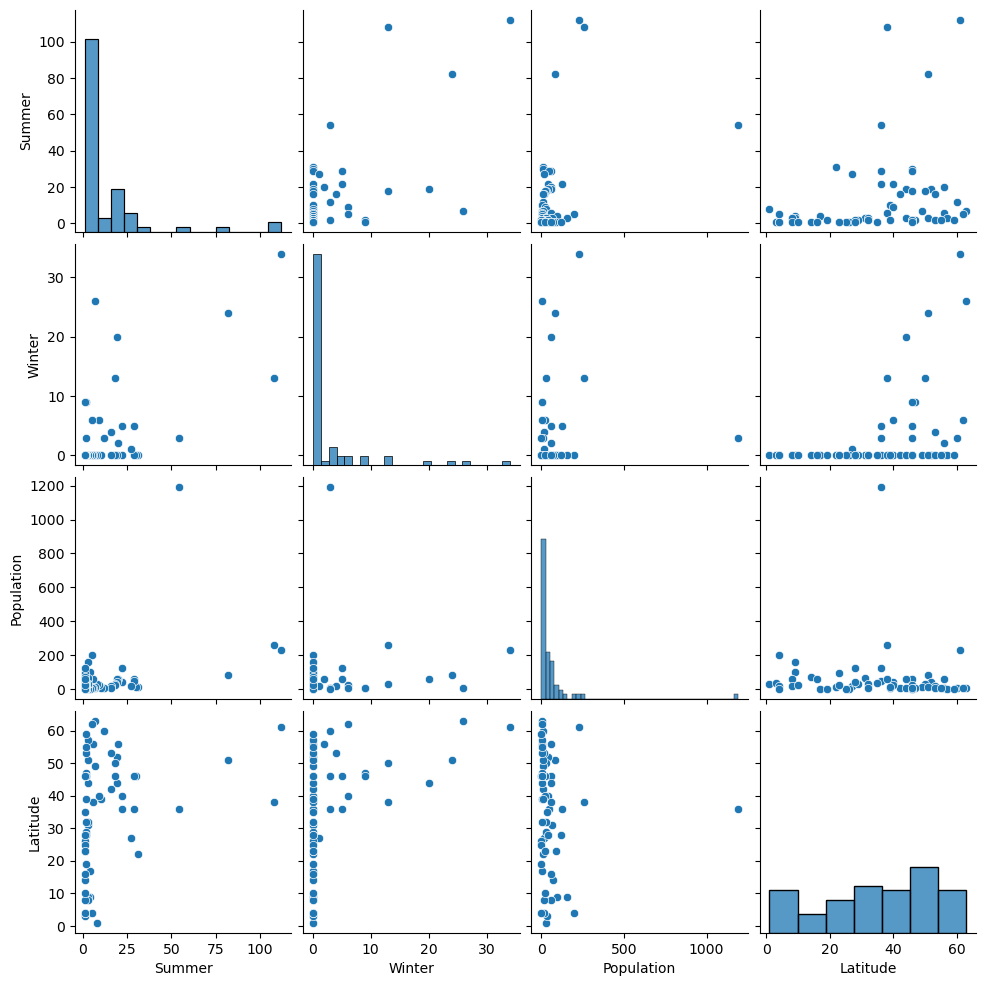

In [45]:
# pairplot
sns.pairplot(df)
plt.show()

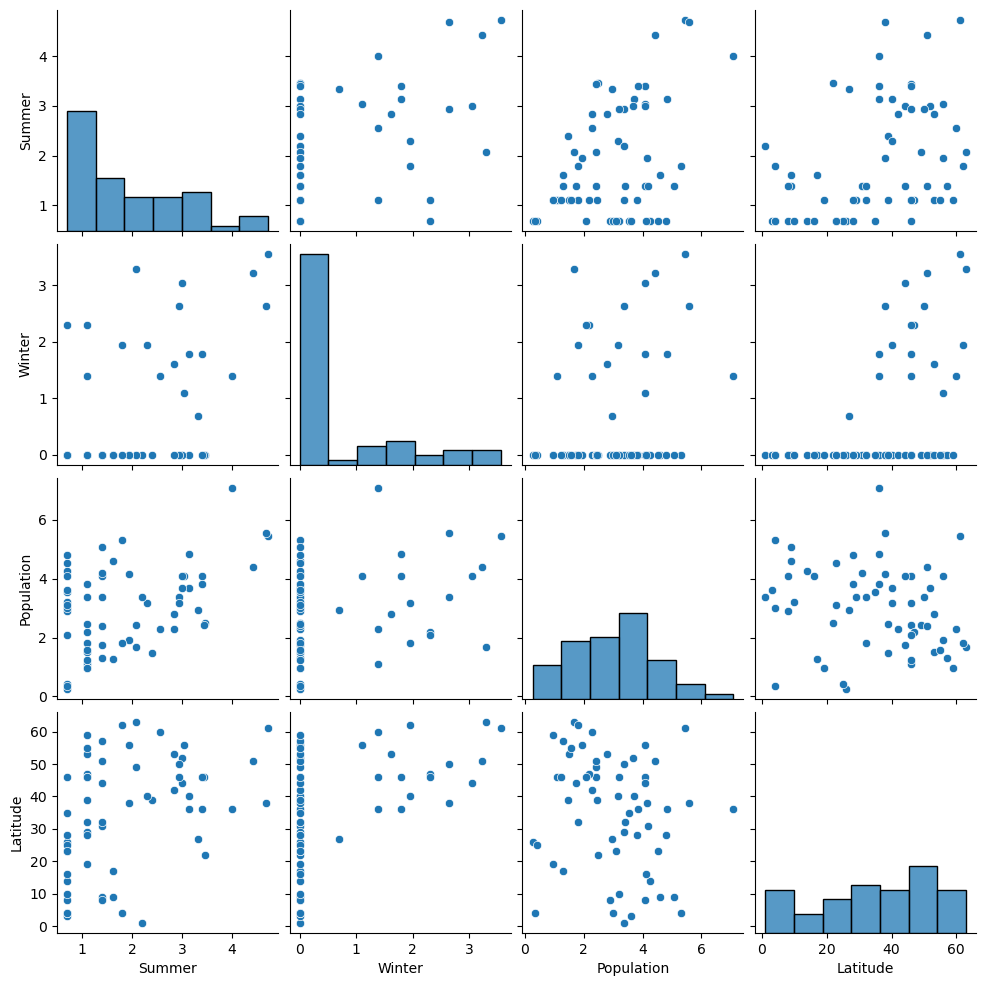

In [46]:
# pairplot
import copy
ndf = copy.deepcopy(df)
ndf['Summer'] = np.log1p(ndf['Summer'])
ndf['Population'] = np.log1p(ndf['Population'])
ndf['Winter'] = np.log1p(ndf['Winter'])
sns.pairplot(ndf)
plt.show()

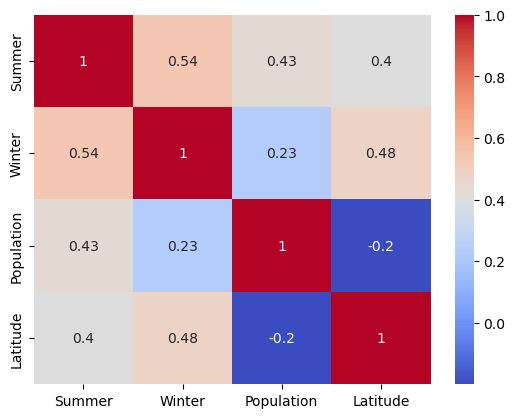

In [47]:
# plot correlation matrix with annotations
corr = (ndf).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

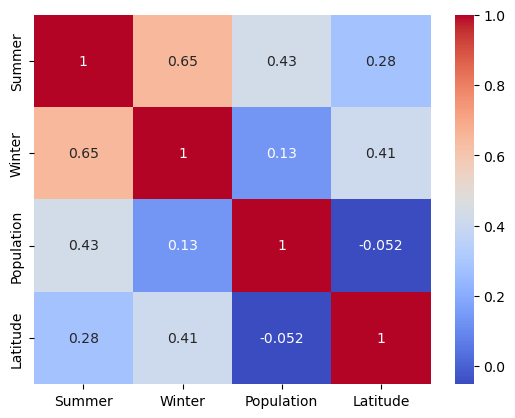

In [48]:
# plot correlation matrix with annotations
corr = (df).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [49]:
# fit ols
model = ols("Summer ~ Winter + Population + Latitude", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Summer   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     23.21
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           5.36e-10
Time:                        11:37:13   Log-Likelihood:                -256.67
No. Observations:                  62   AIC:                             521.3
Df Residuals:                      58   BIC:                             529.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7719      4.686      0.378      0.7

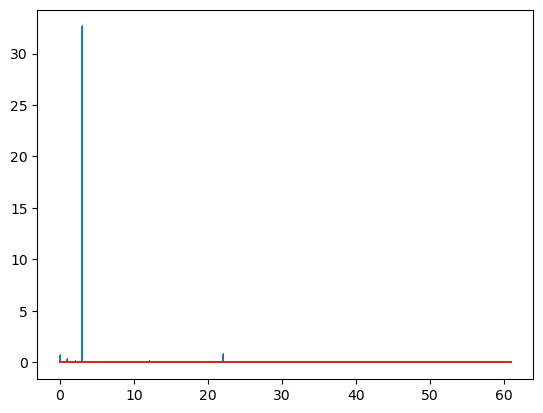

In [50]:
# cook's distance
influence = model.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.show()

In [51]:
# drop max cook's distance
df = df.drop(df.index[np.argmax(c)])

In [52]:
# fit ols
model = ols("Summer ~ Winter + Population + Latitude", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Summer   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     32.50
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.23e-12
Time:                        11:37:13   Log-Likelihood:                -244.98
No. Observations:                  61   AIC:                             498.0
Df Residuals:                      57   BIC:                             506.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4638      4.822     -1.755      0.0

In [53]:
# fit ols
model = ols("Summer ~ Winter + Population + Latitude", data=ndf).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Summer   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     17.91
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.41e-08
Time:                        11:37:13   Log-Likelihood:                -75.214
No. Observations:                  62   AIC:                             158.4
Df Residuals:                      58   BIC:                             166.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1649      0.398     -0.415      0.6

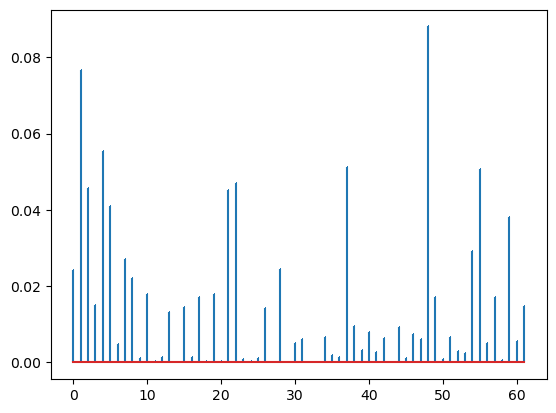

In [54]:
# cook's distance
influence = model.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.show()